<a href="https://colab.research.google.com/github/moheb432/principles-of-smile/blob/main/model_0_001_b16_last_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose,concatenate
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras.models import Sequential
from keras.layers.convolutional import ZeroPadding2D
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report


## df with 6 classes ==> classes
##df1 with 7 classes ==> classes1

In [ ]:
# Clone the entire repo.
!git clone -l -s https://github.com/moheb432/principles-of-smile.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 6508, done.
remote: Counting objects: 100% (1729/1729), done.
remote: Compressing objects: 100% (1713/1713), done.
remote: Total 6508 (delta 33), reused 1706 (delta 16), pack-reused 4779
Receiving objects: 100% (6508/6508), 341.17 MiB | 13.85 MiB/s, done.
Resolving deltas: 100% (296/296), done.
Checking out files: 100% (6999/6999), done.
/content/cloned-repo
 add_augmented_to_csv.py		 mobile-net.ipynb
 all_teeth				 old
'biometrics_dataset - Sheet1.csv'	 Our_cropped_teeth
 Copy_of_biometrics_task_model_1.ipynb	 README.md
 count_samples.py			 resize_with_padding.py
 data_augmentation.py			 smile_dataset
 dataset_2_almid.csv			'teeth_not cropped'
 dataset_2_almid.xlsx			 Untitled.ipynb
 dataset_7_classes.csv			 vgg.ipynb
 dataset_and_augmented.csv		 vgg_transfer_faces.ipynb
 dataset.csv				 vgg_transfer_padded_faces.ipynb
 dataset_split.ipynb			 vgg_transfer_padded_teeth.ipynb
 Dlib-68-face-landmark.png		'vgg_transfer_teeth``.ipy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
classes1 = ['9-gummy', '16-Incisal Embrasure', '4-color', '41-Central Incisor W/H Ratio','18-black triangle','8-gaps', '52-Crooked']
es=EarlyStopping(monitor='val_binary_accuracy',patience=10,mode='max',restore_best_weights=True)
classes = ['9-gummy', '16-Incisal Embrasure', '4-color', '41-Central Incisor W/H Ratio','8-gaps', '52-Crooked']


In [ ]:
df1 = pd.read_csv("/content/cloned-repo/dataset_and_augmented.csv")
df1 = df1.replace(np.nan, 0)
df = pd.read_csv("/content/cloned-repo/dataset_and_augmented.csv")
df = df.replace(np.nan, 0)
df1

,img,9-gummy,16-Incisal Embrasure,4-color,41-Central Incisor W/H Ratio,18-black triangle,8-gaps,52-Crooked
0,41001_B.jpg,1,1,1,1,0.0,0,0
1,41002_B.jpg,0,1,1,1,0.0,1,0
2,41003_B.jpg,1,1,0,1,0.0,0,0
3,41004_B.jpg,1,1,1,1,0.0,1,0
4,41005_B.jpg,1,1,0,1,0.0,0,0
...,...,...,...,...,...,...,...,...
2458,aug_(f15)_0_6500.jpg,0,1,1,1,1.0,1,1
2459,aug_(f15)_0_8219.jpg,0,1,1,1,1.0,1,1
2460,aug_(f15-a)_0_4936.jpg,0,1,1,0,0.0,0,0
2461,aug_(f15-a)_0_7990.jpg,0,1,1,0,0.0,0,0


In [ ]:
train_data_generation = ImageDataGenerator( samplewise_center=True,rescale = 2/255.)


training_set1 = train_data_generation.flow_from_dataframe(dataframe=df1[:],
                                                         directory="/content/cloned-repo/all_teeth/teeth_padded/train",
                                                         x_col="img",
                                                         y_col=classes1,
                                                         target_size=(224, 224),
                                                         batch_size=16,
                                                         class_mode="raw",seed=0)


valid_data_generation = ImageDataGenerator(samplewise_center=True,rescale = 2/255.)

valid_set1 = valid_data_generation.flow_from_dataframe(dataframe=df1[:],
                                                         directory="/content/cloned-repo/all_teeth/teeth_padded/test",
                                                         x_col="img",
                                                         y_col=classes1,
                                                         target_size=(224, 224),
                                                         batch_size=16,
                                                         class_mode="raw",seed=0)

# preprocessing the testing set
test_data_generation = ImageDataGenerator(samplewise_center=True,rescale = 2/255.)

test_set1 = test_data_generation.flow_from_dataframe(dataframe=df1[:],
                                                         directory="/content/cloned-repo/all_teeth/teeth_padded/valid",
                                                         x_col="img",
                                                         y_col=classes1,
                                                         target_size=(224, 224),
                                                         batch_size=1,
                                                         class_mode="raw",seed=0, shuffle = False)
test_set2 = test_data_generation.flow_from_directory("/content/drive/MyDrive/Our_cropped_teeth",
                                                         target_size=(224, 224),
                                                         batch_size=1,
                                                         class_mode=None,seed=0, shuffle = False)

Found 1821 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 642 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2095 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2227 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 368 validated image filenames.
Found 236 validated image filenames.
Found 7 images belonging to 1 classes.


In [ ]:
batch_size =1
X_test1, y_test1 = next(test_set1)
for i in range(int(len(test_set1)/batch_size)-1): #1st batch is already fetched before the for loop.
    img1 , label1 = next(test_set1)
    X_test1 = np.append(X_test1, img1, axis=0 )
    y_test1 = np.append(y_test1, label1, axis=0)

print(X_test1.shape, y_test1.shape)

(236, 224, 224, 3) (236, 7)


# 7 classes

In [ ]:
# model1 = Sequential()
# model1.add(keras.Input(shape=(224,224,3)))
# model1.add(Conv2D(64, (3, 3), activation='relu',name="conv1_1"))
# model1.add(Conv2D(64, (3, 3), activation='relu',name="conv1_2"))
# model1.add(MaxPool2D((2,2), strides=(2,2)))

# model1.add(Conv2D(128, (3, 3), activation='relu',name="conv2_1"))
# model1.add(Conv2D(128, (3, 3), activation='relu',name="conv2_2"))
# model1.add(MaxPool2D((2,2), strides=(2,2)))

# model1.add(Conv2D(256, (3, 3), activation='relu',name="conv3_1"))
# model1.add(Conv2D(256, (3, 3), activation='relu',name="conv3_2"))
# model1.add(Conv2D(256, (3, 3), activation='relu',name="conv3_3"))
# model1.add(MaxPool2D((2,2), strides=(2,2)))
 
# model1.add(Conv2D(512, (3, 3), activation='relu',name="conv4_1"))
# model1.add(Conv2D(512, (3, 3), activation='relu',name="conv4_2"))
# model1.add(Conv2D(512, (3, 3), activation='relu',name="conv4_3"))
# model1.add(MaxPool2D((2,2), strides=(2,2)))

# model1.add(Conv2D(512, (3, 3), activation='relu',name="conv5_1"))
# model1.add(Conv2D(512, (3, 3), activation='relu',name="conv5_2"))
# model1.add(Conv2D(512, (3, 3), activation='relu',name="conv5_3"))
# model1.add(MaxPool2D((2,2), strides=(2,2)))

# model1.load_weights('/content/drive/MyDrive/Copy of 7classes_b16_lr0002.h5', by_name=True,skip_mismatch=True)

# #freezing layers
# for layer in model1.layers:
#     layer.trainable = False

# model1.get_layer("conv3_2").trainable =True
# model1.get_layer("conv4_3").trainable =True
# model1.get_layer("conv4_1").trainable =True
# model1.get_layer("conv4_2").trainable =True
# model1.get_layer("conv5_2").trainable =True
# model1.get_layer("conv5_1").trainable =True

# model2 = Sequential()
# model2.add(keras.Input(shape=(224,224,3)))
# model2.add(Conv2D(64, (3, 3), activation='relu',name="conv1_1"))
# model2.add(Conv2D(64, (3, 3), activation='relu',name="conv1_2"))
# model2.add(MaxPool2D((2,2), strides=(2,2)))

# model2.add(Conv2D(128, (3, 3), activation='relu',name="conv2_1"))
# model2.add(Conv2D(128, (3, 3), activation='relu',name="conv2_2"))
# model2.add(MaxPool2D((2,2), strides=(2,2)))

# model2.add(Conv2D(256, (3, 3), activation='relu',name="conv3_1"))
# model2.add(Conv2D(256, (3, 3), activation='relu',name="conv3_2"))
# model2.add(Conv2D(256, (3, 3), activation='relu',name="conv3_3"))
# model2.add(MaxPool2D((2,2), strides=(2,2)))
 
# model2.add(Conv2D(512, (3, 3), activation='relu',name="conv4_1"))
# model2.add(Conv2D(512, (3, 3), activation='relu',name="conv4_2"))
# model2.add(Conv2D(512, (3, 3), activation='relu',name="conv4_3"))
# model2.add(MaxPool2D((2,2), strides=(2,2)))

# model2.add(Conv2D(512, (3, 3), activation='relu',name="conv5_1"))
# model2.add(Conv2D(512, (3, 3), activation='relu',name="conv5_2"))
# model2.add(Conv2D(512, (3, 3), activation='relu',name="conv5_3"))
# model2.add(MaxPool2D((2,2), strides=(2,2)))

# model2.load_weights('/content/drive/MyDrive/biometrics_weights/7classes_lr0001/7classes_b16_lr0002.h5', by_name=True,skip_mismatch=True)

# #freezing layers
# for layer in model2.layers:
#     layer.trainable = False

# model2.get_layer("conv3_2").trainable =True
# model2.get_layer("conv4_3").trainable =True
# model2.get_layer("conv4_1").trainable =True
# model2.get_layer("conv4_2").trainable =True
# model2.get_layer("conv5_2").trainable =True
# model2.get_layer("conv5_1").trainable =True

# model=concatenate([model1,model2],axis=-1)




# #model.get_layer("conv5_3").trainable =True


# #adding output layers
# model.add(Flatten())

# model.add( Dense(64,use_bias=False,kernel_regularizer=keras.regularizers.L2(0.02)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

# model.add(Dropout(0.5))

# model.add( Dense(64, use_bias=False,kernel_regularizer=keras.regularizers.L2(0.02)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

# model.add(Dropout(0.5))

# model.add( Dense(16, use_bias=False,kernel_regularizer=keras.regularizers.L2(0.01)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

# model.add(Dense(7, activation='sigmoid'))


In [ ]:
# model = Sequential()
# model.add(keras.Input(shape=(224,224,3)))
# model.add(Conv2D(64, (3, 3), activation='relu',name="conv1_1"))
# model.add(Conv2D(64, (3, 3), activation='relu',name="conv1_2"))
# model.add(MaxPool2D((2,2), strides=(2,2)))

# model.add(Conv2D(128, (3, 3), activation='relu',name="conv2_1"))
# model.add(Conv2D(128, (3, 3), activation='relu',name="conv2_2"))
# model.add(MaxPool2D((2,2), strides=(2,2)))

# model.add(Conv2D(256, (3, 3), activation='relu',name="conv3_1"))
# model.add(Conv2D(256, (3, 3), activation='relu',name="conv3_2"))
# model.add(Conv2D(256, (3, 3), activation='relu',name="conv3_3"))
# model.add(MaxPool2D((2,2), strides=(2,2)))
 
# model.add(Conv2D(512, (3, 3), activation='relu',name="conv4_1"))
# model.add(Conv2D(512, (3, 3), activation='relu',name="conv4_2"))
# model.add(Conv2D(512, (3, 3), activation='relu',name="conv4_3"))
# model.add(MaxPool2D((2,2), strides=(2,2)))

# model.add(Conv2D(512, (3, 3), activation='relu',name="conv5_1"))
# model.add(Conv2D(512, (3, 3), activation='relu',name="conv5_2"))
# model.add(Conv2D(512, (3, 3), activation='relu',name="conv5_3"))
# model.add(MaxPool2D((2,2), strides=(2,2)))

# #freezing layers
# for layer in model.layers:
#     layer.trainable = False

# model.get_layer("conv3_2").trainable =True
# model.get_layer("conv4_3").trainable =True
# model.get_layer("conv4_1").trainable =True
# model.get_layer("conv4_2").trainable =True
# model.get_layer("conv5_2").trainable =True
# model.get_layer("conv5_1").trainable =True


# #adding output layers
# model.add(Flatten())

# model.add( Dense(64,use_bias=False,kernel_regularizer=keras.regularizers.L2(0.002)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

# model.add(Dropout(0.5))

# model.add( Dense(64, use_bias=False,kernel_regularizer=keras.regularizers.L2(0.002)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

# model.add(Dropout(0.5))

# model.add( Dense(16, use_bias=False,kernel_regularizer=keras.regularizers.L2(0.001)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))

# # model.add(Dense(7, activation='softmax'))
# # summarize

# model.load_weights('/content/drive/MyDrive/biometrics_weights/7classes_lr0002/7classes_b16.h5', by_name=True)


In [ ]:
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),loss = 'BinaryCrossentropy',metrics=['binary_accuracy'])
# #fit model
# history_7=model.fit(x=training_set, validation_data=valid_set, epochs=50 ,callbacks=[es])

Epoch 1/50
114/114 [==============================] - 28s 225ms/step - loss: 1.2087 - binary_accuracy: 0.6276 - val_loss: 1.1104 - val_binary_accuracy: 0.6259
Epoch 2/50
114/114 [==============================] - 24s 213ms/step - loss: 1.1906 - binary_accuracy: 0.6290 - val_loss: 1.0945 - val_binary_accuracy: 0.6255
Epoch 3/50
114/114 [==============================] - 24s 213ms/step - loss: 1.1574 - binary_accuracy: 0.6322 - val_loss: 1.0807 - val_binary_accuracy: 0.6255
Epoch 4/50
114/114 [==============================] - 24s 213ms/step - loss: 1.1411 - binary_accuracy: 0.6291 - val_loss: 1.0636 - val_binary_accuracy: 0.6250
Epoch 5/50
114/114 [==============================] - 24s 213ms/step - loss: 1.1281 - binary_accuracy: 0.6299 - val_loss: 1.0506 - val_binary_accuracy: 0.6250
Epoch 6/50
114/114 [==============================] - 24s 213ms/step - loss: 1.1079 - binary_accuracy: 0.6316 - val_loss: 1.0437 - val_binary_accuracy: 0.6255
Epoch 7/50
114/114 [==========================

In [ ]:
# acc = history_7.history['binary_accuracy']
# val_acc = history_7.history['val_binary_accuracy']

# loss = history_7.history['loss']
# val_loss = history_7.history['val_loss']

# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
# plt.title('Training and Validation Accuracy')

# plt.subplot(2, 1, 2)
# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.ylabel('Cross Entropy')
# plt.ylim([0,3.1])
# plt.title('Training and Validation Loss')
# plt.xlabel('epoch')
# plt.show()

# load model


In [ ]:
model=keras.models.load_model("/content/drive/MyDrive/biometrics_weights/7classes_lr0001/7classes_b16_lr0002.h5",)
predictions_7= model.predict(test_set1)
y_pred_7=[]
for pred in predictions_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred_7.append(pred)
print(classification_report(y_test1, y_pred_7,target_names=classes1))

                              precision    recall  f1-score   support

                     9-gummy       0.79      0.69      0.73        64
        16-Incisal Embrasure       0.74      0.69      0.72       148
                     4-color       0.80      0.85      0.82       168
41-Central Incisor W/H Ratio       0.67      0.72      0.70       112
           18-black triangle       0.58      0.34      0.43        44
                      8-gaps       0.92      0.48      0.63        48
                  52-Crooked       0.61      0.29      0.39        48

                   micro avg       0.74      0.67      0.70       632
                   macro avg       0.73      0.58      0.63       632
                weighted avg       0.74      0.67      0.69       632
                 samples avg       0.62      0.55      0.56       632



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#confusion mastrix


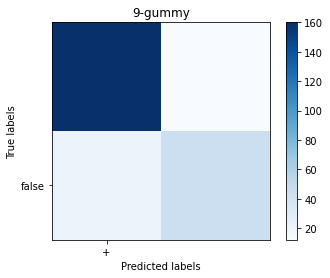

array([[160,  12],
       [ 20,  44]])

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix,plot_confusion_matrix

mat=multilabel_confusion_matrix(y_test1,y_pred_7)

def draw (mat,name):
  plt.imshow(mat, cmap=plt.cm.Blues)
  plt.xlabel("Predicted labels")
  plt.ylabel("True labels")
  plt.xticks([0], ["+"])
  plt.yticks([1], ["false"])
  
  plt.title(name)
  plt.colorbar()



draw(mat[0],classes1[0])
plt.show()
mat[0]

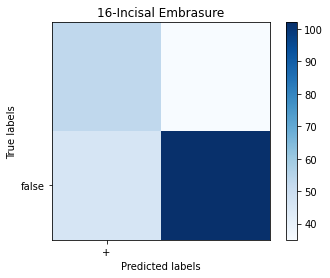

array([[ 53,  35],
       [ 46, 102]])

In [ ]:
draw(mat[1],classes1[1])
plt.show()
mat[1]

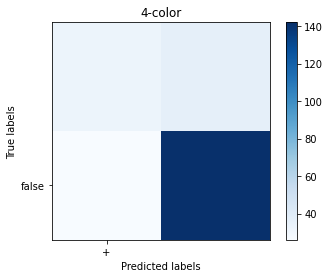

array([[ 32,  36],
       [ 26, 142]])

In [ ]:
draw(mat[2],classes1[2])
plt.show()
mat[2]

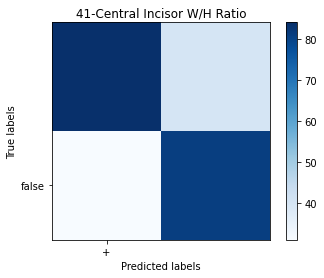

array([[84, 40],
       [31, 81]])

In [ ]:
draw(mat[3],classes1[3])
plt.show()
mat[3]

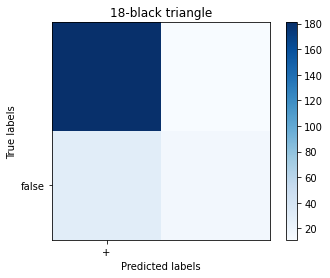

array([[181,  11],
       [ 29,  15]])

In [ ]:
draw(mat[4],classes1[4])
plt.show()
mat[4]

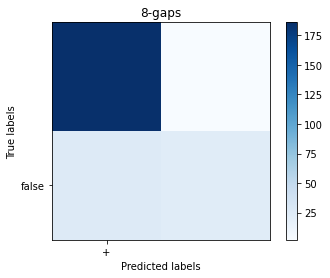

array([[186,   2],
       [ 25,  23]])

In [ ]:
draw(mat[5],classes1[5])
plt.show()
mat[5]

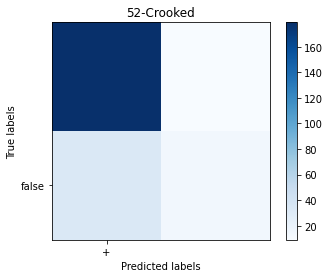

array([[179,   9],
       [ 34,  14]])

In [ ]:
draw(mat[6],classes1[6])
plt.show()
mat[6]

#test model

In [ ]:
# predictions_7= model.predict(test_set2)
# y_pred_7=[]
# for pred in predictions_7:
#     pred[pred>0.5]=1
#     pred[pred<=0.5]=0
#     y_pred_7.append(pred)
# # y_pred=pd.DataFrame(y_pred_7)
# y_pred.columns=classes1
# # class=[for i in y_pred_7:
  
# for i in range(7):
#   img =next(test_set2)
#   img=img[0]  #first image
#   plt.imshow(img)
#   test_set2.reset()


,0
0,9-gummy
1,16-Incisal Embrasure
2,4-color
3,41-Central Incisor W/H Ratio
4,8-gaps


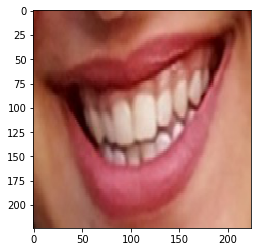

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
image = load_img('/content/drive/MyDrive/Our_cropped_teeth/0/Karin.jpg', target_size=(224, 224))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
predictions_7= model.predict(image)
y_pred_7=[]
for pred in predictions_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred_7.append(pred)
# classes=[for i in y_pred_7[0]:
l=[]
for i in range(7):
  if y_pred_7[0][i]==1 :
        l.append(classes1[i])
l
pd.DataFrame(l)

,0
0,16-Incisal Embrasure
1,4-color
2,52-Crooked


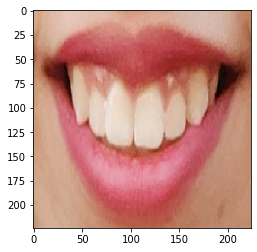

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
image = load_img('/content/drive/MyDrive/Our_cropped_teeth/0/fatma_O.jpg', target_size=(224, 224))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
predictions_7= model.predict(image)
y_pred_7=[]
for pred in predictions_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred_7.append(pred)
# classes=[for i in y_pred_7[0]:
l=[]
for i in range(7):
  if y_pred_7[0][i]==1 :
        l.append(classes1[i])
l
pd.DataFrame(l)

,0
0,16-Incisal Embrasure
1,4-color
2,41-Central Incisor W/H Ratio
3,8-gaps


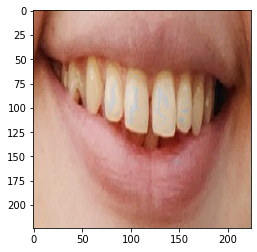

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
image = load_img('/content/drive/MyDrive/Our_cropped_teeth/0/fatma_G.jpg', target_size=(224, 224))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
predictions_7= model.predict(image)
y_pred_7=[]
for pred in predictions_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred_7.append(pred)
# classes=[for i in y_pred_7[0]:
l=[]
for i in range(7):
  if y_pred_7[0][i]==1 :
        l.append(classes1[i])
l
pd.DataFrame(l)

,0
0,16-Incisal Embrasure
1,41-Central Incisor W/H Ratio


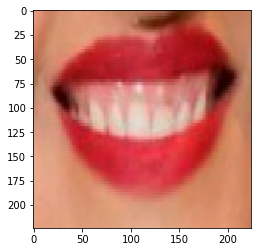

In [ ]:
image = load_img('/content/drive/MyDrive/Our_cropped_teeth/0/mariam.jpg', target_size=(224, 224))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
predictions_7= model.predict(image)
y_pred_7=[]
for pred in predictions_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred_7.append(pred)
# classes=[for i in y_pred_7[0]:
l=[]
for i in range(7):
  if y_pred_7[0][i]==1 :
        l.append(classes1[i])
l
pd.DataFrame(l)

,0
0,16-Incisal Embrasure
1,4-color


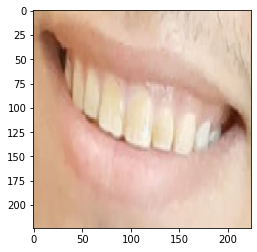

In [ ]:
image = load_img('/content/drive/MyDrive/Our_cropped_teeth/0/moheb.jpg', target_size=(224, 224))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
predictions_7= model.predict(image)
y_pred_7=[]
for pred in predictions_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred_7.append(pred)
# classes=[for i in y_pred_7[0]:
l=[]
for i in range(7):
  if y_pred_7[0][i]==1 :
        l.append(classes1[i])
l
pd.DataFrame(l)

,0
0,9-gummy
1,16-Incisal Embrasure
2,4-color
3,41-Central Incisor W/H Ratio


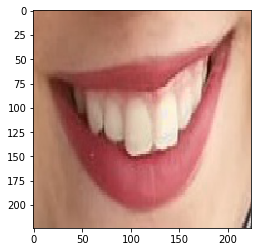

In [ ]:
image = load_img('/content/drive/MyDrive/Our_cropped_teeth/0/toka.jpg', target_size=(224, 224))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
predictions_7= model.predict(image)
y_pred_7=[]
for pred in predictions_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred_7.append(pred)
# classes=[for i in y_pred_7[0]:
l=[]
for i in range(7):
  if y_pred_7[0][i]==1 :
        l.append(classes1[i])
l
l=pd.DataFrame(l)

,0
0,9-gummy
1,16-Incisal Embrasure
2,4-color
3,41-Central Incisor W/H Ratio
4,8-gaps


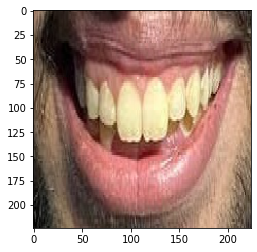

In [ ]:
image = load_img('/content/drive/MyDrive/Our_cropped_teeth/0/photo_2021-12-22_21-52-131.jpg', target_size=(224, 224))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
predictions_7= model.predict(image)
y_pred_7=[]
for pred in predictions_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred_7.append(pred)
# classes=[for i in y_pred_7[0]:
l=[]
for i in range(7):
  if y_pred_7[0][i]==1 :
        l.append(classes1[i])
pd.DataFrame(l)

In [ ]:
from tensorflow.keras import layers
model2=keras.models.load_model("/content/drive/MyDrive/biometrics_weights/7classes_lr0001/7classes_b16_lr0002.h5")
base_inputs = model2.layers[0].input
base_output = model2.layers[-2].output
output = layers.Dense(6,activation='sigmoid')(base_output)
model2 = keras.Model(base_inputs, output)
print(model2.summary())

In [ ]:
classes2=['9-gummy',
 '16-Incisal Embrasure',
 '4-color',
 '41-Central Incisor W/H Ratio',
 '18-black triangle',
 '8-gaps']

In [ ]:
image = load_img('/content/drive/MyDrive/Our_cropped_teeth/0/fatma_G.jpg', target_size=(224, 224))
plt.imshow(image)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
predictions_7= model2.predict(image)
y_pred_7=[]
for pred in predictions_7:
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    y_pred_7.append(pred)
# classes=[for i in y_pred_7[0]:
l=[]
for i in range(6):
  if y_pred_7[0][i]==1 :
        l.append(classes2[i])
l
pd.DataFrame(l)

In [ ]:
model2